# TMDB Movie data analysis

In this notebook I will try to find out Which actors tend to appear together
in movies frequently. Are there iconic duos or trios that consistently
appear across different films?

I will use TMDB dataset to perform the analysis.

#### Required libraries

- pandas
- matplotlib
- seaborn
- networkx
- scipy


Let's import necessary libraries and import the dataset


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

df = pd.read_csv("tmdb-movies.csv")

In [138]:
df.shape

(10866, 21)

We can see there are more than 10,000 records. Let's see the top 5 movies


In [139]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data wrangling


Lets check for null and zero values


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the total 10866 records there exists some null values in some columns.

In the `cast` and `imdb_id` columns I decided to drop the null values for two reasons

- they are very little in amount
- they can't be filled with other values (e.g. average values),

For other columns I decided to drop the entire columns since they are not relevant for this case.


In [141]:
df.dropna(subset=["cast"], inplace=True)
df.dropna(subset=["imdb_id"], inplace=True)

Check for duplicate values


In [142]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [143]:
print(df[df.imdb_id == "tt0411951"])

         id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2089  Dwight H. Little  Survival is no game  ...   
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2089  In the year of 2039, after World Wars destroy ...      92   
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light So

We can see that there is a duplicate entry with the imdb_id `tt0411951`. Lets remove is.


In [144]:
df.drop_duplicates(inplace=True)

Reduce the data frame to contain only the desired columns


In [145]:
df = df[["id", "imdb_id", "original_title", "cast"]]
df.head()

,id,imdb_id,original_title,cast
0,135397,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,76341,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,262500,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,140607,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,168259,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


We can see that the cast column contains a string with actor names separated by `|`. Les change that to list of strings.


In [146]:
df["cast"] = df["cast"].str.split("|")
df.head()

,id,imdb_id,original_title,cast
0,135397,tt0369610,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan..."
1,76341,tt1392190,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,..."
2,262500,tt2908446,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A..."
3,140607,tt2488496,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad..."
4,168259,tt2820852,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche..."


Calculate the number of actors for each movie and create a new column called 'num_actors' and visualize the distribution of the number of actors per movie using a histogram


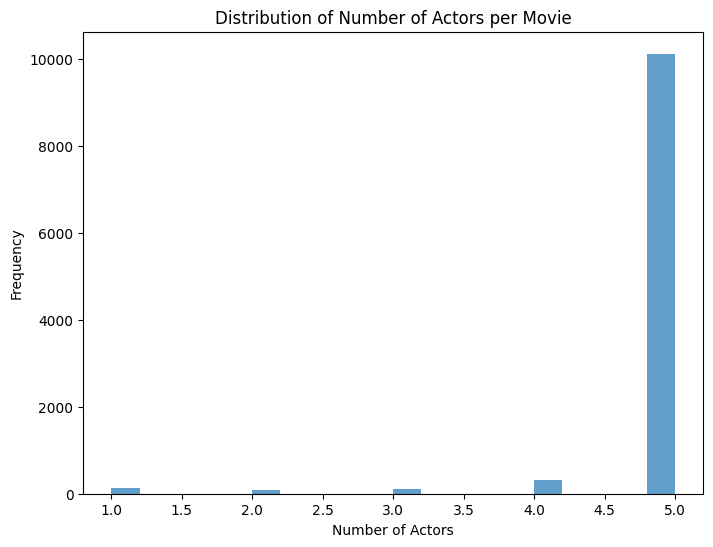

[5 3 4 2 1]


In [147]:
# Count the length of cast columns in each record and create a new column called 'num_actors'
df['num_actors'] = df['cast'].apply(
    lambda x: len(x))

plt.figure(figsize=(8, 6))
plt.hist(df['num_actors'], bins=20, alpha=0.7)
plt.xlabel('Number of Actors')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Actors per Movie')
plt.show()

print(df["num_actors"].unique())

We can see that almost all the movies listed 5 actors as casts

Now lets find out how many unique actors are there in the dataset


In [148]:
# Create a set of all unique actors
all_actors = [actor for sublist in df['cast'] for actor in sublist]

# Calculate the total count of unique actors
total_unique_actors = len(all_actors)
print("Total Unique Actors:", total_unique_actors)

Total Unique Actors: 52527


Count the appearances of each actor and find out actors with the most and least appearances


In [149]:
# Count the appearances of each actor
actor_appearances = pd.Series(all_actors).value_counts()

# Actor with the most appearances
most_appearing_actor = actor_appearances.idxmax()
most_appearances_count = actor_appearances.max()
print("Most appearing actor:", most_appearing_actor,
      "with", most_appearances_count, "appearances")

# Actor with the least appearances
least_appearing_actor = actor_appearances.idxmin()
least_appearances_count = actor_appearances.min()
print("Least appearing actor:", least_appearing_actor,
      "with", least_appearances_count, "appearance")

Most appearing actor: Robert De Niro with 72 appearances
Least appearing actor: Peter Chiang with 1 appearance


Plotting the distribution of actor appearances


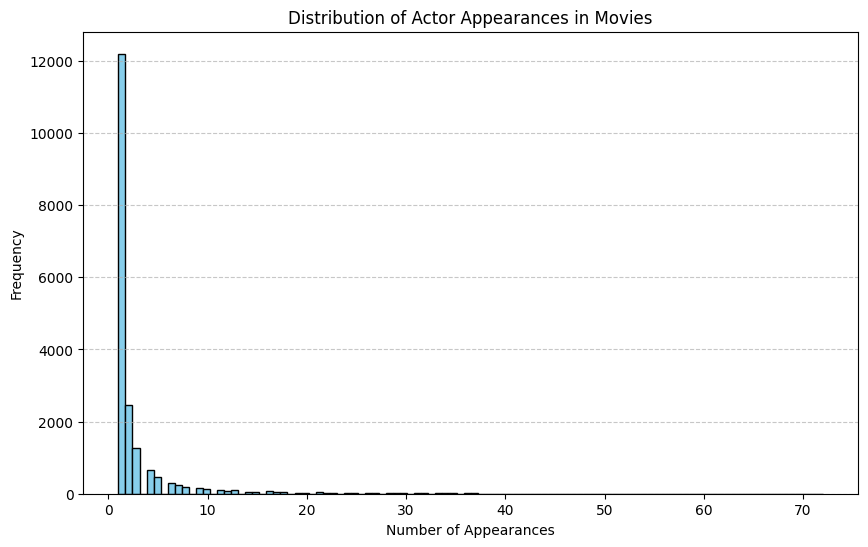

In [150]:
plt.figure(figsize=(10, 6))
plt.hist(actor_appearances, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of Actor Appearances in Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above graph we can see that most of the actors only appeared in one movie


Now let's create a co-occurrence matrix


In [151]:
from itertools import combinations
from collections import defaultdict

co_occurrence_matrix = defaultdict(int)

for cast_list in df['cast']:
    # create a combination of two for actors
    for actor_pair in combinations(cast_list, 2):
        co_occurrence_matrix[tuple(sorted(actor_pair))] += 1

# Convert the co-occurrence matrix to a DataFrame for better manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix.items(), columns=[
                                'Actor Pair', 'Co-occurrences'])
co_occurrence_df = co_occurrence_df.sort_values(
    by='Co-occurrences', ascending=False)

# Display the top pairs of actors with the highest co-occurrence counts
print(co_occurrence_df.head(10))

                                Actor Pair  Co-occurrences
23805      (Ashley Olsen, Mary-Kate Olsen)              12
9995          (Frank Welker, Grey Griffin)               9
9998            (Frank Welker, Mindy Cohn)               9
66284        (Kenneth Williams, Sid James)               9
66288  (Charles Hawtrey, Kenneth Williams)               9
66289        (Joan Sims, Kenneth Williams)               8
72481            (Mia Farrow, Woody Allen)               8
35081           (John Lennon, Ringo Starr)               8
35079        (Paul McCartney, Ringo Starr)               8
35078        (John Lennon, Paul McCartney)               8


#### CONCLUSION: The most frequent appearing duos are the twin sisters Ashley Olsen and Mary-Kate Olsen with the total of 12 movies

LIMITATIONS: At the time of writing The Movie Database contains 969,695 movies, 163,778 tv shows and 3,289,679 people but our dataset only has a little more than 10,000 movies and 52,000 actors. Also the dataset doesn't account for TV shows. Therefore the results might change if we include more data.


We can further visualize the co-occurrence matrix by using graphs. Each node represents an actor and drawing an edge between two actors that appears together in a movie.

NB - You can increase the value of the `LIMIT` variable to include more nodes and edges, but when the value becomes too high the graph becomes unseeable.


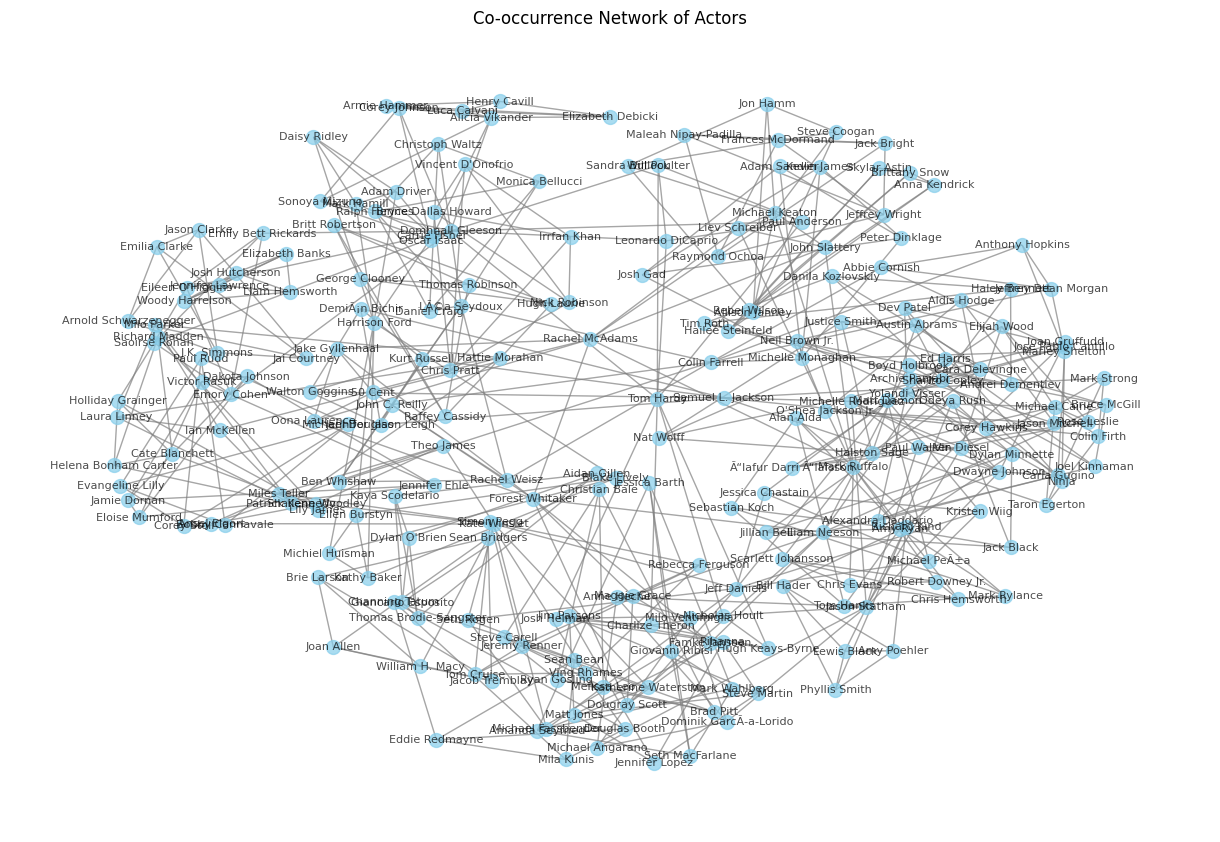

In [152]:
LIMIT = 500

graph = nx.Graph()

i = 0
for actor_pair, co_occurrences in co_occurrence_matrix.items():
    if i == LIMIT:
        break

    # add nodes and edges to graph
    actor1, actor2 = actor_pair
    graph.add_edge(actor1, actor2, weight=co_occurrences)

    i += 1

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=0.5)
nx.draw(graph, pos, with_labels=True, node_size=100, font_size=8,
        alpha=0.7, node_color='skyblue', edge_color='gray')
plt.title('Co-occurrence Network of Actors')
plt.show()

Also we can go further and look for groups of actors within the network who often work together.

NB - You can increase the value of the `GROUP_LIMIT` variable to include more nodes and edges, but when the value becomes too high the graph becomes unseeable.


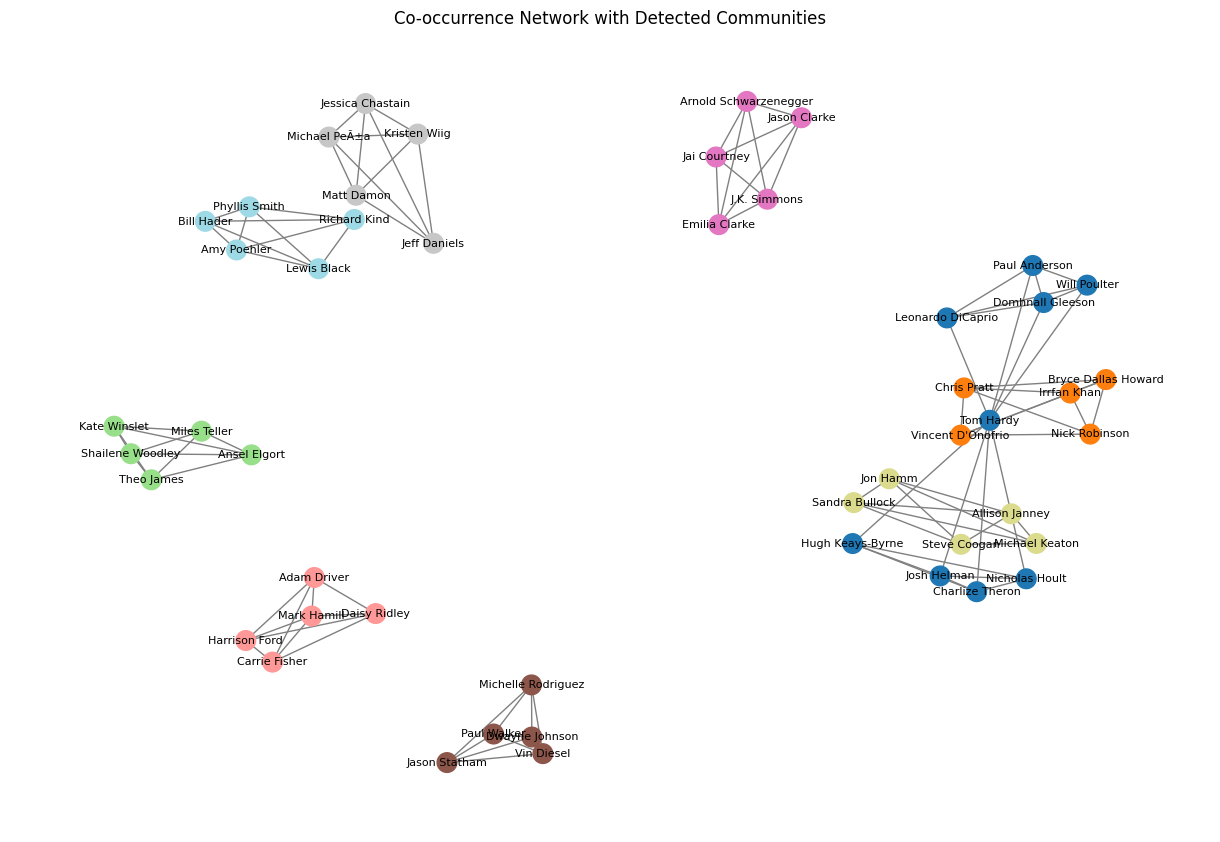

In [153]:
GROUP_LIMIT = 100

group_graph = nx.Graph()

i = 0
for actor_pair, co_occurrences in co_occurrence_matrix.items():
    if i == GROUP_LIMIT:
        break

    # add nodes and edges to graph
    actor1, actor2 = actor_pair
    group_graph.add_edge(actor1, actor2, weight=co_occurrences)

    i += 1

# Detect communities using Louvain method
communities = nx.algorithms.community.greedy_modularity_communities(
    group_graph)

# Mapping nodes to their respective communities
node_community = {node: idx for idx, community in enumerate(
    communities) for node in community}

# Visualizing the network graph with communities
plt.figure(figsize=(12, 8))

# Positioning nodes using spring layout
pos = nx.spring_layout(group_graph, k=0.5)
nx.draw(group_graph, pos, with_labels=True, node_size=200, font_size=8, node_color=[
        node_community[node] for node in group_graph.nodes()], cmap=plt.cm.tab20, edge_color='gray')
plt.title('Co-occurrence Network with Detected Communities')
plt.show()